In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from warnings import filterwarnings
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples , silhouette_score

In [108]:
filterwarnings("ignore") 

In [109]:
df = pd.read_csv('Data_pts.csv',header =  None)
df.columns = ['Col1','Col2']

In [110]:
df.head()

,Col1,Col2
0,0.075220,-0.134484
1,-0.010374,-0.195679
2,0.090225,0.141263
3,0.117467,0.081682
4,-0.152645,0.042330


In [111]:
df.isnull().sum()

Col1    0
Col2    0
dtype: int64

In [112]:
df.describe()

,Col1,Col2
count,295.000000,295.000000
mean,-0.050131,-0.023782
std,0.594336,0.862549
min,-1.330306,-1.927601
25%,-0.484858,-0.731601
50%,-0.059248,0.012216
75%,0.340075,0.552891
max,1.341061,2.040625


<Axes: >

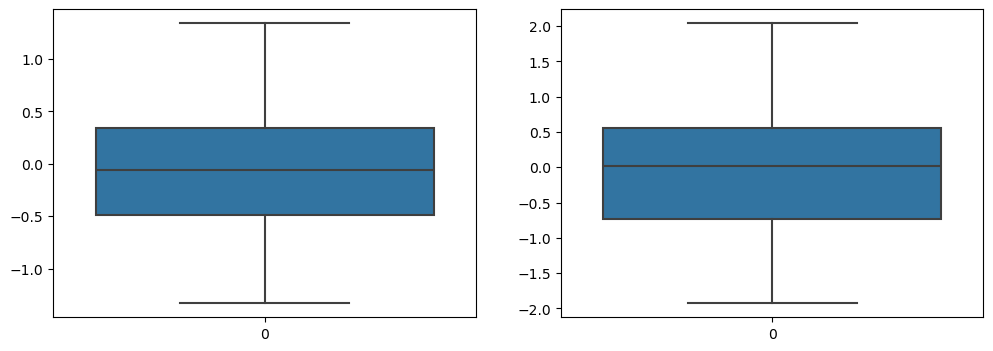

In [113]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (12,4))
sns.boxplot(df['Col1'], ax= ax1)
sns.boxplot(df['Col2'], ax=ax2)

<Axes: xlabel='Col1', ylabel='Col2'>

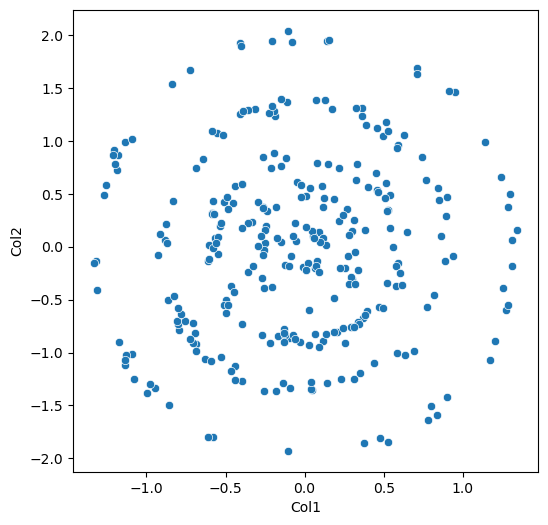

In [114]:
fig, ax = plt.subplots(figsize= (6,6))
sns.scatterplot(x='Col1', y = 'Col2',data= df, ax= ax)

##### statement 1: Since the data is in spherical-shaped cluster we prefer using DBSCAN Algorithm to create segments.

In [115]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
dist, indices = nbrs.kneighbors(df)

* For finding the Epsilon for the DBSCAN Algorithm

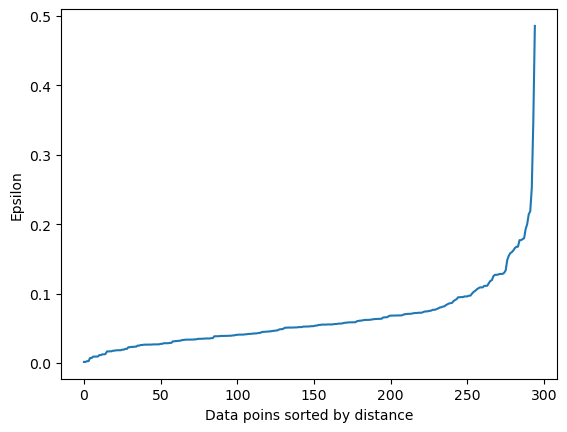

In [116]:
dist = np.sort(dist,axis =0 )
dist = dist[:,1]
plt.plot(dist)
plt.xlabel('Data poins sorted by distance')
plt.ylabel('Epsilon')
plt.show()

* Since most of the data are separated with epsilon value greater than 0.2, we should go ahead with epsilon value which is greater than 0.2

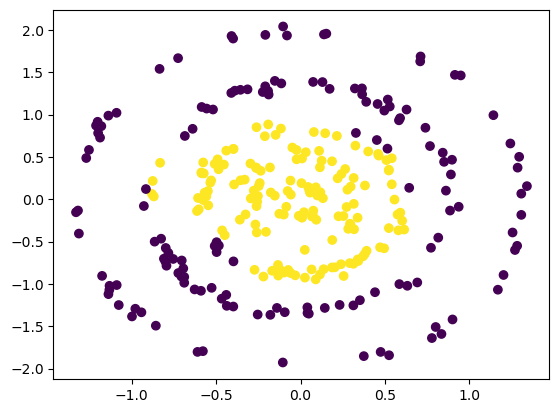

In [117]:
dbscan = DBSCAN(eps=0.325, min_samples=20)
cluster_labels = dbscan.fit_predict(df)
# Plotting
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster_labels, cmap='viridis', marker='o')

##### Problem statement 2: Since the data is in spherical-shaped cluster we prefer using DBSCAN Algorithm to create segments.

To ensure that points with negative first coordinate and positive first coordinate are not clustered together we use the below 2 steps :
* We separate the negative first coordinate and the positive first coordinate values.
* We apply the K-means clustering algorithm separately within each group. Since the groups are disjoint by design, no cluster will contain points with both positive and negative first coordinates.

In [118]:
neg_df = df[df['Col1']<0]; pos_df = df[df['Col1']>0]

The average silhouette_score  and DBscore is : 0.2250395292341899


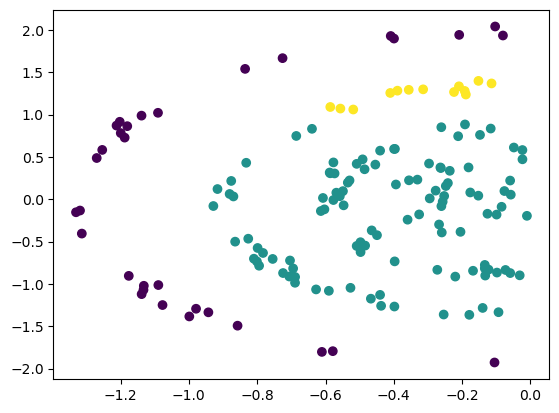

In [119]:
dbscan = DBSCAN(eps=0.35, min_samples=11)
cluster_labels = dbscan.fit_predict(neg_df)
# Plotting

silhouette_avg = silhouette_score(neg_df, cluster_labels)
print(
       
        "The average silhouette_score  and DBscore is :",
        silhouette_avg
    )

plt.scatter(neg_df.iloc[:, 0], neg_df.iloc[:, 1], c=cluster_labels, cmap='viridis', marker='o')

* Segmentation, not able to performed well by DBSACN algorthm

For n_clusters = 2 The average silhouette_score and DBScore is : 0.45412215668424455 0.7864027282218972
For n_clusters = 3 The average silhouette_score and DBScore is : 0.4032347830002488 0.8115788657928213


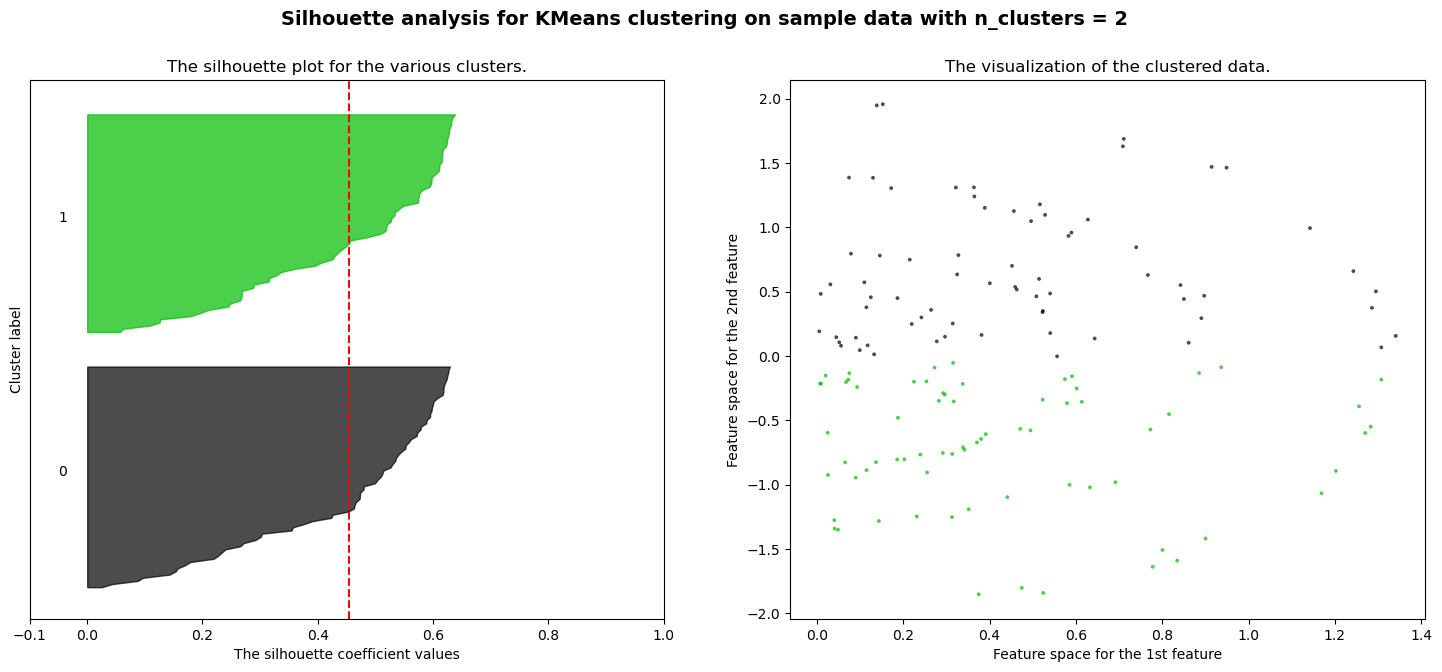

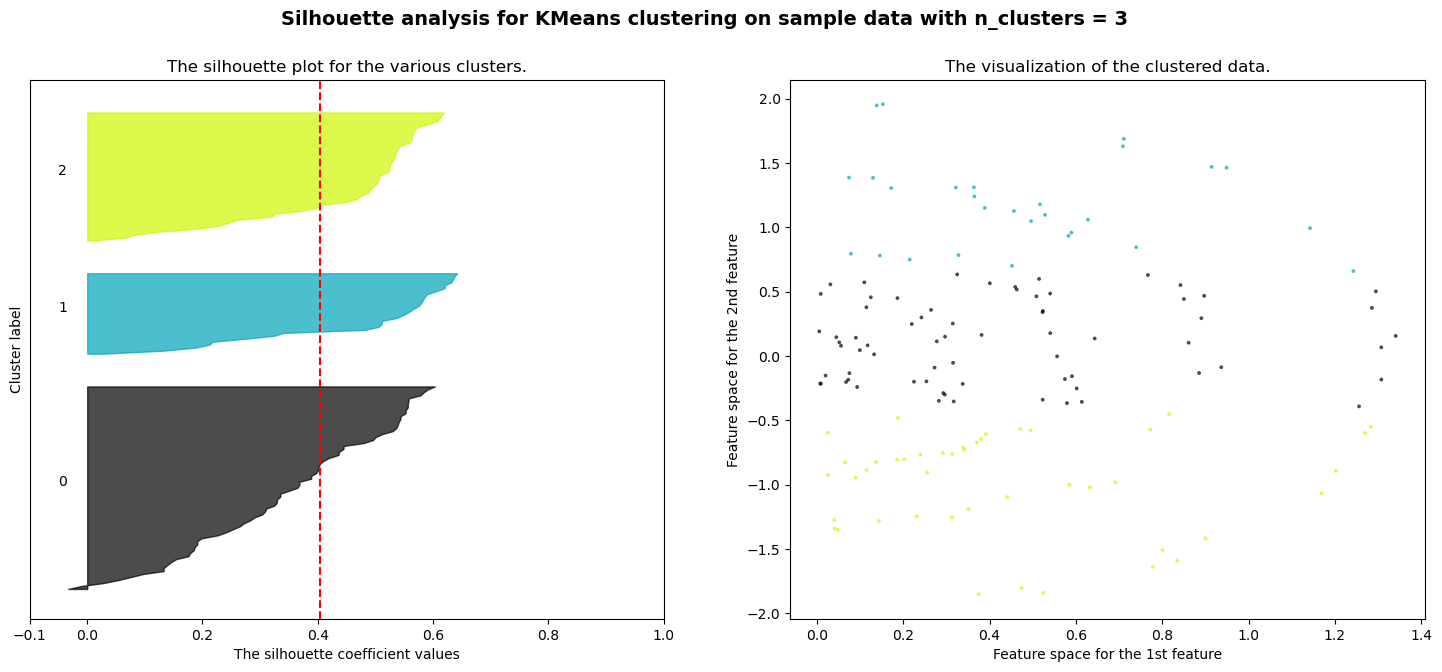

In [120]:
range_n_clusters = range(2,4)
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pos_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(pos_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pos_df, cluster_labels)
    dbScore = metrics.davies_bouldin_score(pos_df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score and DBScore is :",
        silhouette_avg,dbScore,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pos_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pos_df.iloc[:, 0], pos_df.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

* Since, Silhouette Score is highest for clustering number 2, we pick the number of segments as 2 for optimal value

For n_clusters = 2 The average silhouette_score and DBScore is : 0.47543157336548714 0.7494560929449551
For n_clusters = 3 The average silhouette_score and DBScore is : 0.4522021268174084 0.7778616048787218


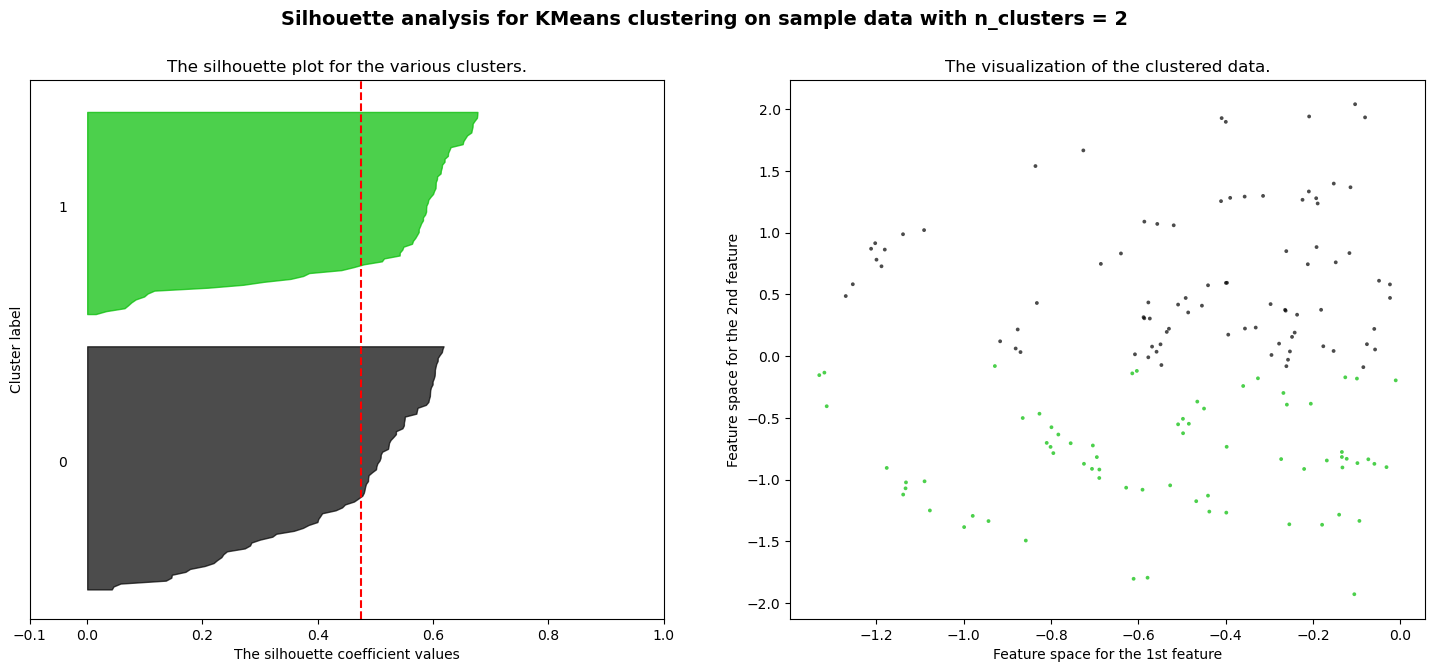

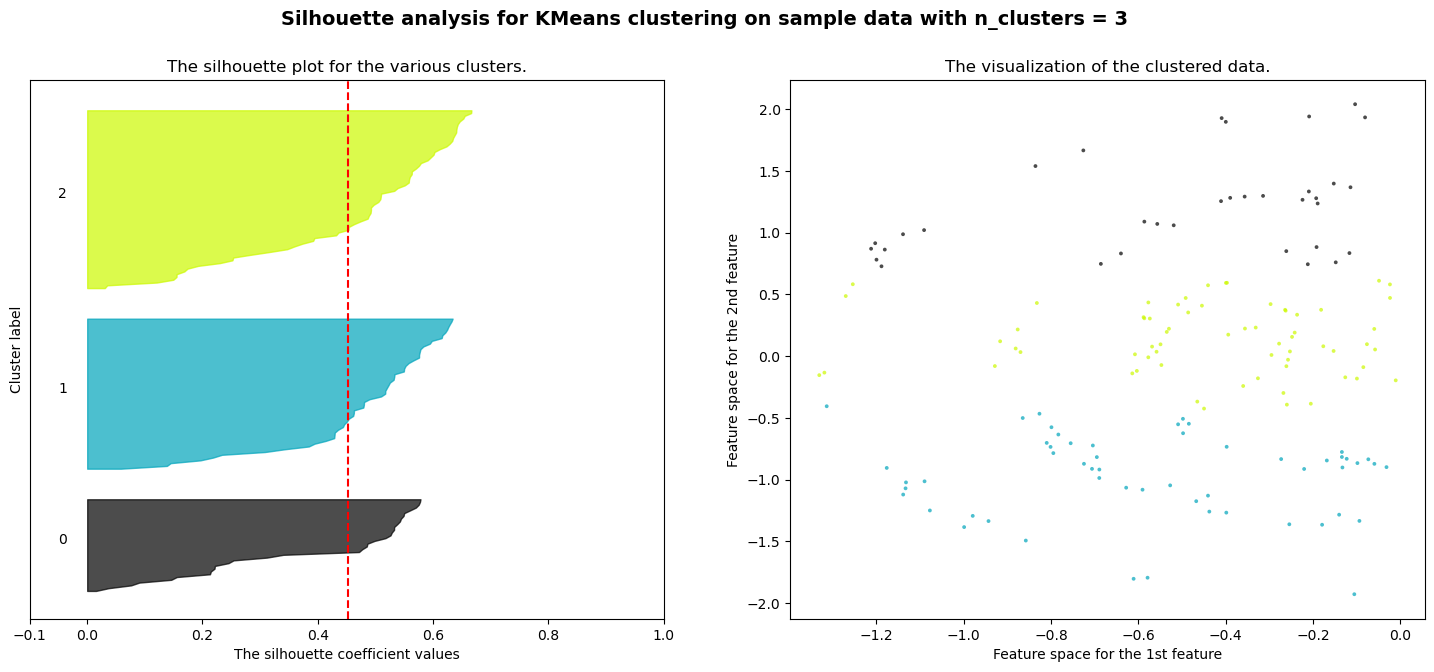

In [121]:
range_n_clusters = range(2,4)
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(neg_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(neg_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(neg_df, cluster_labels)
    dbScore = metrics.davies_bouldin_score(neg_df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score and DBScore is :",
        silhouette_avg,dbScore,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(neg_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(neg_df.iloc[:, 0], neg_df.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

* Since, Silhouette Score is highest for clustering number 2, we pick the number of segments as 2 for optimal value

For n_clusters = 2 The average silhouette_score 0.381566231028588 DB_Score is : 0.9865887183945768
For n_clusters = 4 The average silhouette_score 0.33138431316943856 DB_Score is : 1.008988806396566


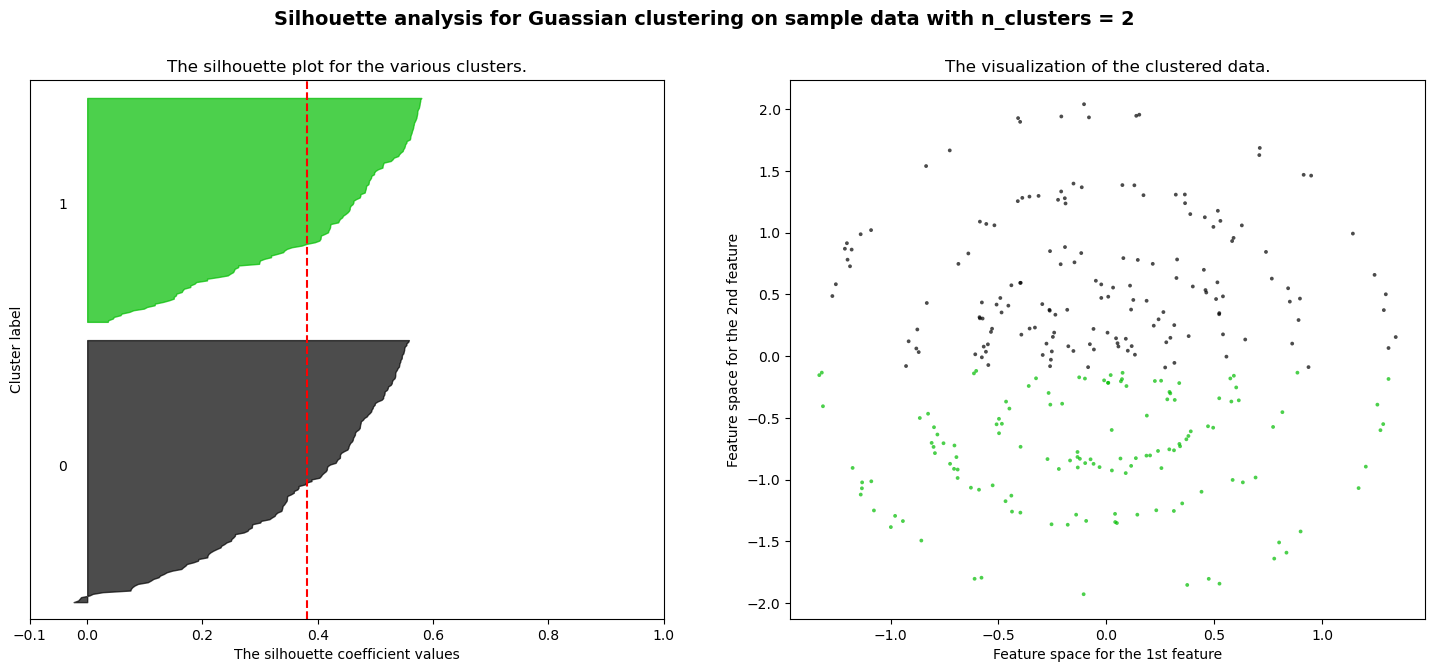

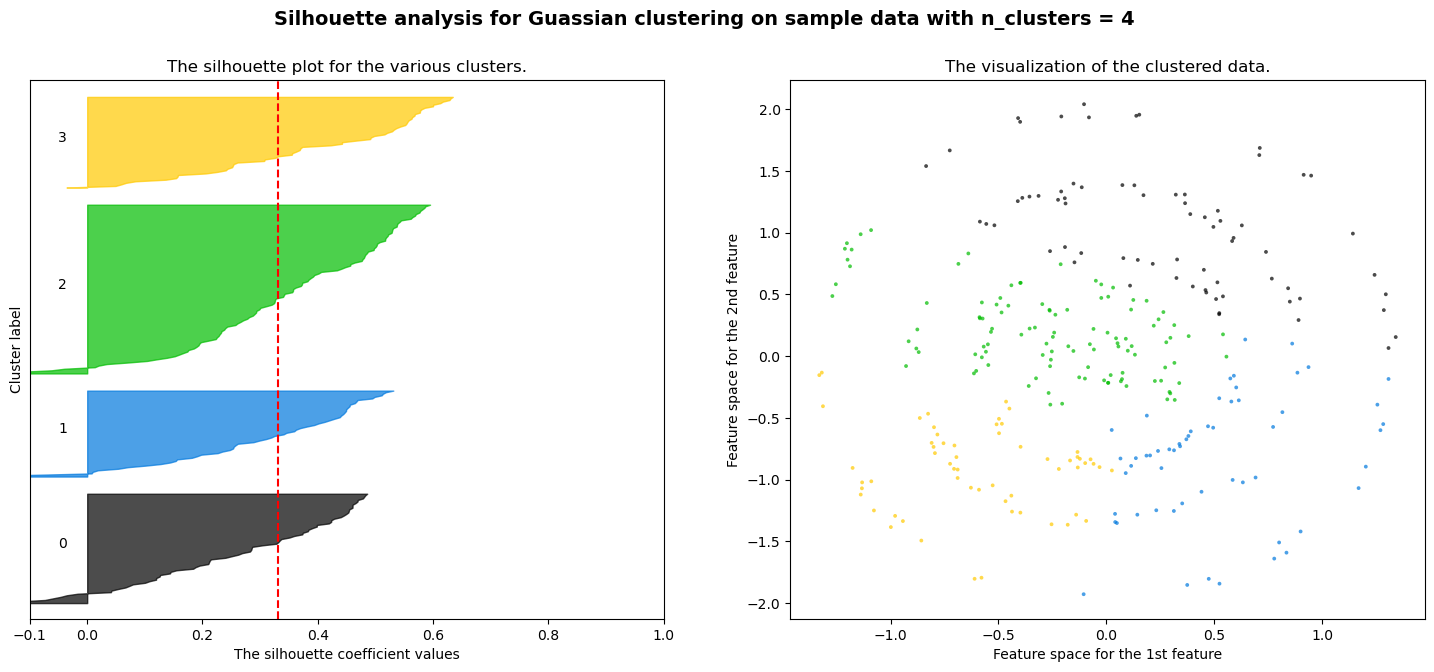

In [122]:
from sklearn.mixture import GaussianMixture
range_n_clusters = [2,4]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    dbScore = metrics.davies_bouldin_score(df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score", silhouette_avg, "DB_Score is :", dbScore
    )
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for Guassian clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

* If we don't want 100% Positive and Negative first coordinate separation, we can go ahead with GMM model, since it is based on distribution of data
* Postive and Negitive coordinate would be separated if we choose cluster size = 4